# SAUD AHMAD KHAN (17160145056)

# COVID PREDICTION

Covid data has been taken from: https://github.com/nshomron/covidpred/tree/master/data. 1 million data points are available here and as such to process such amount of data it would require a lot of time so only 40000 data points have been used to save time.  

In [80]:
#Importing covid data using Pandas

import pandas as pd
covid_data = pd.read_csv(r'/content/corona_tested_individuals.english.csv')
print(covid_data.keys())
print(f'Shape: {covid_data.shape}')
print(f'type(covid_data): {type(covid_data)}')
covid_data

Index(['test_date', 'cough', 'fever', 'sore_throat', 'shortness_of_breath',
       'head_ache', 'corona_result'],
      dtype='object')
Shape: (1030724, 7)
type(covid_data): <class 'pandas.core.frame.DataFrame'>


,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result
0,12-11-20,0,0,0,0,0,negative
1,12-11-20,0,1,0,0,0,negative
2,12-11-20,0,0,0,0,0,negative
3,12-11-20,0,0,0,0,0,negative
4,12-11-20,0,1,0,0,0,negative
...,...,...,...,...,...,...,...
1030719,10-09-20,0,0,0,0,0,negative
1030720,10-09-20,0,0,0,0,0,negative
1030721,10-09-20,0,0,0,0,0,negative
1030722,10-09-20,0,0,0,0,0,negative


In [109]:
#Seperating features from the dataset.

covid_data_features = covid_data.iloc[10000:250000, 1:6]
print(covid_data_features.keys())
covid_data_features

Index(['cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache'], dtype='object')


,cough,fever,sore_throat,shortness_of_breath,head_ache
10000,0,0,0,0,0
10001,0,0,0,0,0
10002,0,0,0,0,0
10003,0,0,0,0,0
10004,0,0,0,0,0
...,...,...,...,...,...
249995,0,0,0,0,0
249996,0,0,0,0,0
249997,0,0,0,0,0
249998,0,0,0,0,0


In [110]:
#Seperating Corona result from the dataset.

covid_data_result  = covid_data.corona_result
covid_data_result1 = pd.DataFrame(covid_data_result)
covid_data_result2 = covid_data_result1.iloc[10000:250000, :]
print(f'Shape: {covid_data_result2.shape}')
print(f'type(covid_data_result2): {type(covid_data_result2)}')
covid_data_result2

Shape: (240000, 1)
type(covid_data_result2): <class 'pandas.core.frame.DataFrame'>


,corona_result
10000,negative
10001,negative
10002,negative
10003,negative
10004,negative
...,...
249995,negative
249996,negative
249997,negative
249998,negative


In [111]:
#Converting text into numeric form.

from sklearn import preprocessing
label_encode = preprocessing.LabelEncoder()
covid_data_result3 = label_encode.fit_transform(covid_data_result2.corona_result)
print(f'Shape: {covid_data_result3.shape}')
print(f'type(covid_data_result3): {type(covid_data_result3)}')
covid_data_result3

Shape: (240000,)
type(covid_data_result3): <class 'numpy.ndarray'>


array([0, 0, 0, ..., 0, 0, 0])

# VISUALIZTION:

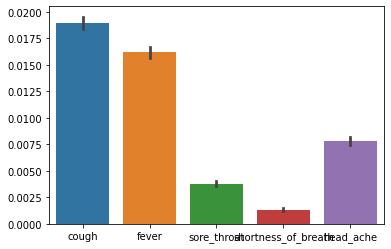

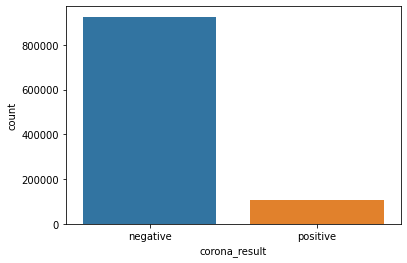

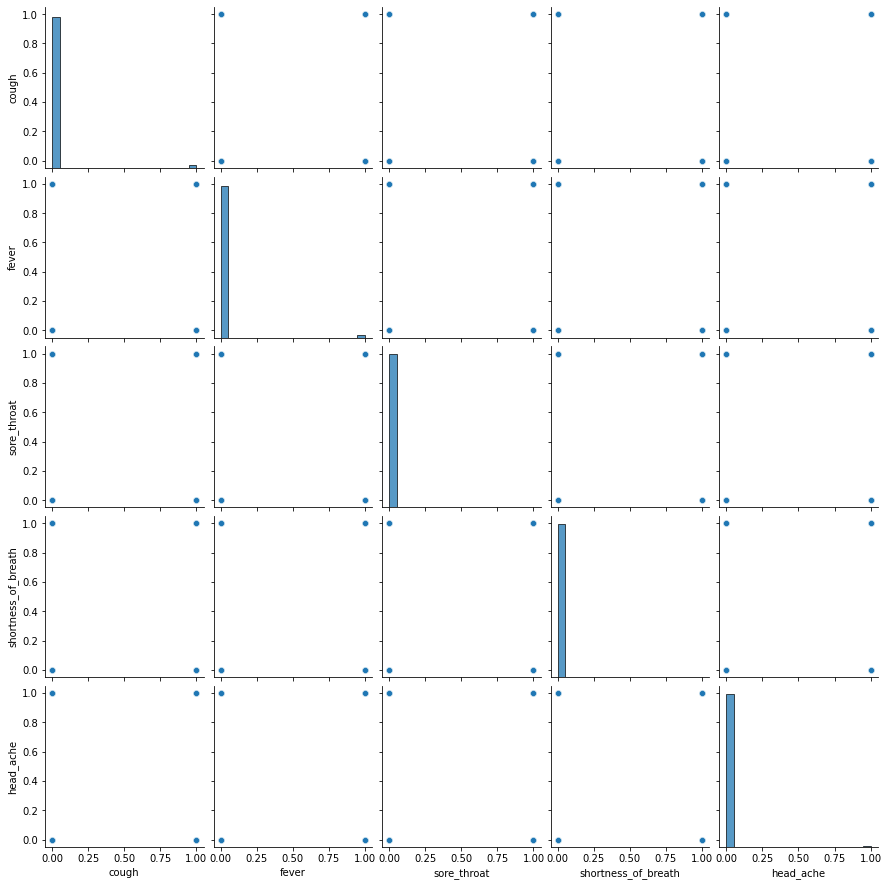

In [132]:
#Visualizing the data using the seaborn as well as matplotlib packages of the python.

import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(data = covid_data_features)
plt.show()
sns.countplot(x = covid_data_result)
plt.show()
sns.pairplot(data = covid_data_features)
plt.show()


# Data splitting:

In [112]:
#Splitting the data into the training and testing data with 75% and 25% of the each set respectively. Thus creating 4 different variables X_train, y_train, X_test and y_test.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(covid_data_features, covid_data_result3, random_state=0)
print(f'X_train shape: {X_train.shape} \ny_train shape: {y_train.shape} \nX_test  shape: {X_test.shape} \ny_test  shape: {y_test.shape}')

X_train shape: (180000, 5) 
y_train shape: (180000,) 
X_test  shape: (60000, 5) 
y_test  shape: (60000,)


# Preprocessing:

In [114]:
#Performing preprocessing

from sklearn import preprocessing
quantile_transformer = preprocessing.QuantileTransformer(n_quantiles=1000, random_state=0)
X_train_trans = quantile_transformer.fit_transform(X_train)
X_test_trans = quantile_transformer.transform(X_test)

# Knn implmentation:

In [116]:
#Training nearest neighbour model.

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
y_prd_knn = knn.predict(X_test)
con1 = confusion_matrix(y_test, y_prd_knn)
print(f'Nearest_neighbor_train_score: {knn.score(X_train, y_train)*100 :.2f}%')
print(f'Nearest_neighbor_test_score: {knn.score(X_test, y_test)*100 :.2f}%')
print(f'Confusion matrix: \n{con1}')

Nearest_neighbor_train_score: 97.72%
Nearest_neighbor_test_score: 97.58%
Confusion matrix: 
[[58024    69]
 [ 1385   522]]


# Testing

In [121]:
# Testing Knn with dummy features
X_test1 =[[ 1, 0, 0, 0, 0]]
df1 = pd.DataFrame(X_test1, columns =covid_data_features.keys())
df1

,cough,fever,sore_throat,shortness_of_breath,head_ache
0,1,0,0,0,0


In [122]:
y_prd_knn = knn.predict(df1)
result1 = label_encode.inverse_transform(y_prd_knn)
print(f'Result: {result1[0]}')

Result: negative


# Logistic regression implementation:

In [115]:
#Training logestic regression model.

from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_prd_lrm = logistic_model.predict(X_test)
con3 = confusion_matrix(y_test, y_prd_lrm)
print(f'Logestic_regression_train_score: {logistic_model.score(X_train, y_train)*100 :.2f}%')
print(f'Logestic_regression_test_score: {logistic_model.score(X_test, y_test)*100 :.2f}%')
print(f'Confusion matrix: \n{con3}')

Logestic_regression_train_score: 97.72%
Logestic_regression_test_score: 97.57%
Confusion matrix: 
[[58019    74]
 [ 1386   521]]


# Testing

In [123]:
# Testing logestic regression with dummy features
X_test2 =[[ 0, 1, 0, 1, 1]]
df2 = pd.DataFrame(X_test2, columns =covid_data_features.keys())
df2

,cough,fever,sore_throat,shortness_of_breath,head_ache
0,0,1,0,1,1


In [124]:
y_prd_lrm = logistic_model.predict(df2)
result2 = label_encode.inverse_transform(y_prd_lrm)
print(f'Result: {result2[0]}')

Result: positive


# Neural networks implementation:

In [117]:
#Training Multi layer prceptron model.

from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter = 225000, random_state = 0)
mlp.fit(X_train,y_train)
y_prd_mlp = mlp.predict(X_test)
con4 = confusion_matrix(y_test, y_prd_mlp)
print(f'MLP_train_score: {mlp.score(X_train, y_train)*100 :.2f}%')
print(f'Mlp_test_score: {mlp.score(X_test, y_test)*100 :.2f}%')
print(f'Confusion matrix: \n{con4}')

MLP_train_score: 97.74%
Mlp_test_score: 97.59%
Confusion matrix: 
[[58019    74]
 [ 1369   538]]


# Testing

In [125]:
# Testing MLP with dummy features
X_test3 =[[ 0, 0, 0, 0, 0]]
df3 = pd.DataFrame(X_test3, columns =covid_data_features.keys())
df3

,cough,fever,sore_throat,shortness_of_breath,head_ache
0,0,0,0,0,0


In [126]:
result3 = label_encode.inverse_transform(y_prd_mlp)
print(f'Result: {result3[0]}')

Result: negative


# Linear regression implementation:

In [118]:
#Training Linear regression model.


from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train_trans, y_train)
y_prd = linear_model.predict(X_test_trans)
print(f'Linear_regression_train_score: {linear_model.score(X_train_trans, y_train)*100 :.2f}%')
print(f'Linear_regression_test_score: {linear_model.score(X_test_trans, y_test)*100 :.2f}%')

Linear_regression_train_score: 26.86%
Linear_regression_test_score: 24.39%


# Testing

In [127]:
# Testing linar regression with dummy feature
X_test4 =[[ 0, 1, 1, 0, 1]]
df4 = pd.DataFrame(X_test4, columns =covid_data_features.keys())
df4

,cough,fever,sore_throat,shortness_of_breath,head_ache
0,0,1,1,0,1


In [128]:
y_prd1 = linear_model.predict(df4)
#converting to integer form as LR is continuous. eg here y_pred was 1.6 and its label i.e positive or negative wouldnt have been assigned as we have 0=negative and 1= positve.
y_pred = int(y_prd1)
#converting back to array form with the help of numpy as .inverse_transform takes array as arguement.
import numpy as np

y_pred1 = np.array([y_pred])
result4= label_encode.inverse_transform(y_pred1)
print(f'Result: {result4[0]}')

Result: positive


# SVM implementation:

In [129]:
#Training Support vector machines model

from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_prd_svm = svc.predict(X_test)
con5 = confusion_matrix(y_test, y_prd_svm)
print(f'svc_train_score: {svc.score(X_train, y_train)*100 :.2f}%')
print(f'svc_test_score: {svc.score(X_test, y_test)*100 :.2f}%')
print(f'Confusion matrix: \n{con5}')

svc_train_score: 97.74%
svc_test_score: 97.59%
Confusion matrix: 
[[58019    74]
 [ 1369   538]]


# Testing

In [130]:
# Testing SVM with dummy feature
X_test5 =[[ 1, 1, 1, 1, 1]]
df5 = pd.DataFrame(X_test5, columns =covid_data_features.keys())
df5

,cough,fever,sore_throat,shortness_of_breath,head_ache
0,1,1,1,1,1


In [131]:
y_prd_svm = svc.predict(df5)
result5= label_encode.inverse_transform(y_prd_svm)
print(f'Result: {result5[0]}')

Result: positive
